In [1]:
# Read the graph from the edge list file and print the graph

import networkx as nx

# Read the edge list
G = nx.read_edgelist("D:\\Academic\\Master\\ST5225\\com-amazon.ungraph.txt")

# Print the graph
print(G)

Graph with 334863 nodes and 925872 edges


In [2]:
import numpy as np
# Generate samples from a power law distribution
alpha = 1.5  # Power law exponent
num_samples = 20  # Number of samples to generate

# Generate samples using the power law distribution formula
samples = np.random.pareto(alpha - 1, num_samples)

formatted_samples = [f"{sample:.1f}" for sample in samples]
print(", ".join(formatted_samples))

0.2, 2.0, 1.2, 6.7, 1.7, 9.8, 0.9, 1.4, 3.0, 0.0, 2.4, 0.1, 56.2, 770.6, 7.2, 0.9, 10.9, 0.3, 5.6, 0.8


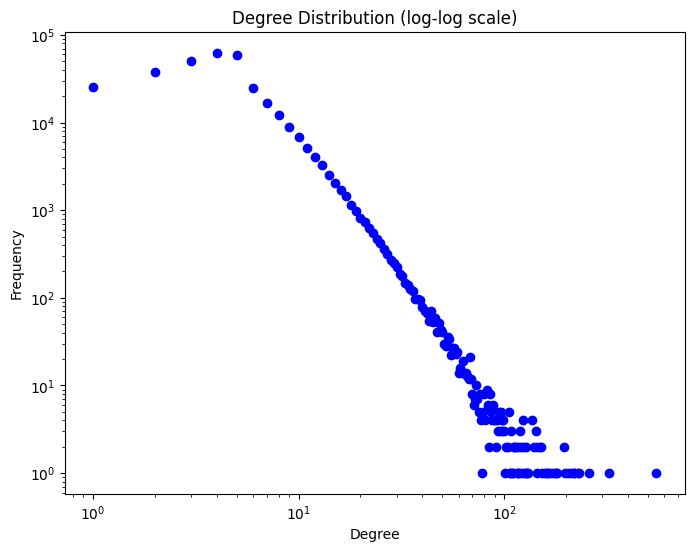

In [3]:
import matplotlib.pyplot as plt

# Calculate the degree histogram
degree_hist = nx.degree_histogram(G)

# Create arrays for degrees and their frequencies
degrees = range(len(degree_hist))
counts = degree_hist

# Plot on a log-log scale
plt.figure(figsize=(8, 6))
plt.scatter(degrees, counts, color='blue', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (log-log scale)')
plt.show()

In [4]:
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Create a DataFrame from the degree distribution
df = pd.DataFrame({
    'degree': list(range(len(degree_hist))),
    'frequency': degree_hist
})

# Remove zero values (degrees or frequencies that are zero)
df = df[(df['degree'] > 0) & (df['frequency'] > 0)]

# Log-transform the degree and frequency columns
df['log_degree'] = np.log10(df['degree'])
df['log_frequency'] = np.log10(df['frequency'])

# Perform linear regression on the log-log data
slope, intercept, r_value, p_value, std_err = linregress(df['log_degree'], df['log_frequency'])

print(f"Estimated power law exponent (slope): {-slope:.8f}")
print(f"Intercept: {intercept:.8f}")
print(f"R-squared: {r_value**2:.8f}")

Estimated power law exponent (slope): 2.81376124
Intercept: 6.28349960
R-squared: 0.92999347


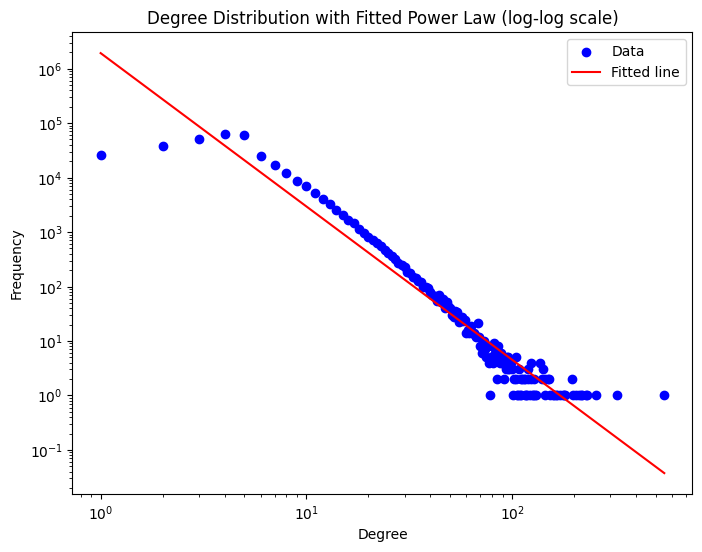

In [5]:
# Scatter plot of degree distribution (log-log)
plt.figure(figsize=(8, 6))
plt.scatter(df['degree'], df['frequency'], color='blue', marker='o', label='Data')
plt.xscale('log')
plt.yscale('log')

# Plot the estimated regression line
log_degrees = np.log10(df['degree'])
fitted_log_freq = slope * log_degrees + intercept
plt.plot(df['degree'], 10**fitted_log_freq, color='red', label='Fitted line')

plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution with Fitted Power Law (log-log scale)')
plt.legend()
plt.show()

In [6]:
from powerlaw import Fit

fit = Fit(df['degree'].repeat(df['frequency']), discrete=True)
ks_statistic, p_value = fit.distribution_compare('power_law', 'lognormal')

print(f"KS statistic (power law vs lognormal): {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value > 0.05:
    print("The power law is a plausible fit (fail to reject H0).")
else:
    print("The power law is not a good fit (reject H0).")

Calculating best minimal value for power law fit
KS statistic (power law vs lognormal): -8.7592
P-value: 0.0236
The power law is not a good fit (reject H0).


Average shortest path length (from 100 samples): 12.41


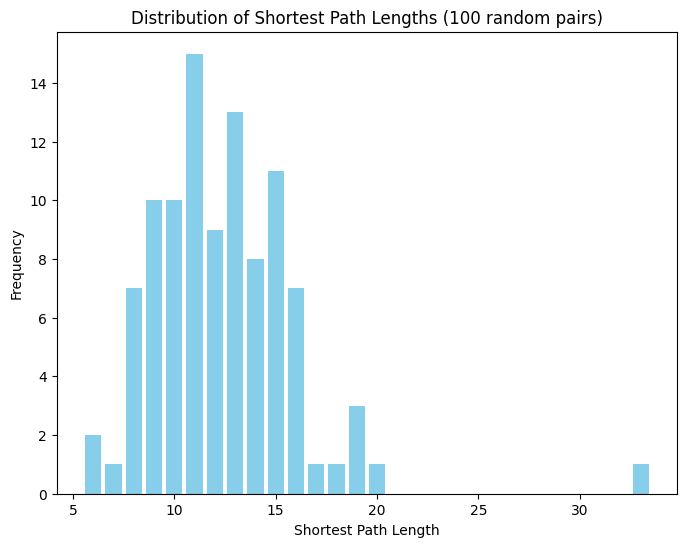

In [7]:
import random
from collections import Counter

# Get the list of nodes
nodes = list(G.nodes())
shortest_paths = []

# Repeat 100 times
for _ in range(100):
    # Randomly pick two distinct nodes
    u, v = random.sample(nodes, 2)
    try:
        # Calculate the shortest path length
        length = nx.shortest_path_length(G, source=u, target=v)
        shortest_paths.append(length)
    except nx.NetworkXNoPath:
        # If no path exists, skip or record as np.nan
        continue

# Calculate the average shortest path length
if shortest_paths:
    avg_length = sum(shortest_paths) / len(shortest_paths)
    print(f"Average shortest path length (from 100 samples): {avg_length:.2f}")
else:
    print("No paths found between sampled pairs.")

# Plot the distribution as a bar plot
path_counts = Counter(shortest_paths)
plt.figure(figsize=(8, 6))
plt.bar(path_counts.keys(), path_counts.values(), color='skyblue')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.title('Distribution of Shortest Path Lengths (100 random pairs)')
plt.show()

In [8]:
# Extract the giant component (largest connected component) as a subgraph and print it

# Find the largest connected component
giant_component_nodes = max(nx.connected_components(G), key=len)
giant_component = G.subgraph(giant_component_nodes).copy()

# Print the giant component
print(giant_component)

Graph with 334863 nodes and 925872 edges


In [9]:
def estimate_connectivity(G, k=100):
  shortest_paths = []
  connected_count = 0

  node_list = list(G.nodes())

  for _ in range(k):
    # Pick two random nodes
    u, v = np.random.choice(node_list, 2)

    # Check if the nodes are connected
    if nx.has_path(G, u, v):
      connected_count += 1
      shortest_path = nx.shortest_path_length(G, u, v)
      shortest_paths.append(shortest_path)

  # Calculate the probability of connectivity
  connectivity_probability = connected_count / k

  # Calculate the average shortest path length if connected
  if shortest_paths:
    average_shortest_path = np.mean(shortest_paths)
  else:
    average_shortest_path = 0

  return connectivity_probability, average_shortest_path


In [10]:
con_p, avg_sp = estimate_connectivity(giant_component, k=100)
print(f"Connectivity probability for G: {con_p:.4f}")
print(f"Average shortest path length for G: {avg_sp:.4f}")

Connectivity probability for G: 1.0000
Average shortest path length for G: 11.7500


In [11]:
G_removed = G.copy()

# Calculate the number of edges to remove (10%)
num_edges_to_remove = int(0.1 * G_removed.number_of_edges())

# Randomly sample edges to remove
edges_to_remove = random.sample(list(G_removed.edges()), num_edges_to_remove)

# Remove the edges
G_removed.remove_edges_from(edges_to_remove)

giant_component_nodes_removed = max(nx.connected_components(G_removed), key=len)
giant_component_removed = G_removed.subgraph(giant_component_nodes_removed).copy()

# Print the giant component
print(giant_component_removed)

con_p_removed, avg_sp_removed = estimate_connectivity(G_removed, k=100)
print(f"Connectivity probability for G_removed: {con_p_removed:.4f}")
print(f"Average shortest path length for G_removed: {avg_sp_removed:.4f}")

Graph with 328867 nodes and 828769 edges
Connectivity probability for G_removed: 0.9500
Average shortest path length for G_removed: 12.3263


In [13]:
# Calculate additional robustness measures for the graph

# 1. Size of the largest connected component (as a fraction of all nodes)
fraction_largest_cc = len(giant_component) / G.number_of_nodes()
print(f"Fraction of nodes in largest connected component: {fraction_largest_cc:.4f}")

# 2. Number of connected components
num_components = nx.number_connected_components(G)
print(f"Number of connected components: {num_components}")

# 3. Average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average clustering coefficient: {avg_clustering:.4f}")

# 4. Network diameter (only for the largest connected component)
# if nx.is_connected(G):
#     diameter = nx.diameter(G)
#     print(f"Diameter of largest connected component: {diameter}")
# else:
#     print("Largest component is not connected (unexpected for undirected graphs).")

Fraction of nodes in largest connected component: 1.0000
Number of connected components: 1
Average clustering coefficient: 0.3967


In [15]:
G = nx.read_edgelist("D:\\Academic\\Master\\ST5225\\soc-redditHyperlinks-body.tsv", data=False, create_using=nx.MultiDiGraph())

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 35778
Number of edges: 286562


c:\Users\Li Yuxin\anaconda3\envs\ST5225\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


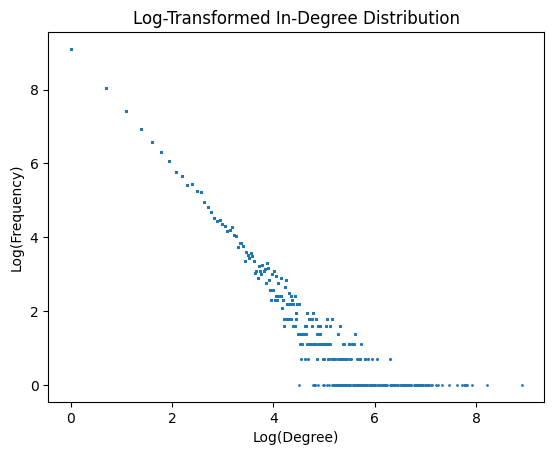

In [16]:
# Calculate the in-degree distribution
in_degrees = dict(G.in_degree())
degree_dist = list(in_degrees.values())

# Create a data frame with the in-degree and frequency
degree_df = pd.DataFrame({'Degree': degree_dist})
degree_df['Frequency'] = degree_df['Degree'].map(degree_df['Degree'].value_counts())

# Plot the in-degree distribution on a log-log scale as a scatter plot
plt.scatter(np.log(degree_df['Degree']), np.log(degree_df['Frequency']), s=1)
plt.xlabel('Log(Degree)')
plt.ylabel('Log(Frequency)')
plt.title('Log-Transformed In-Degree Distribution')
plt.show()

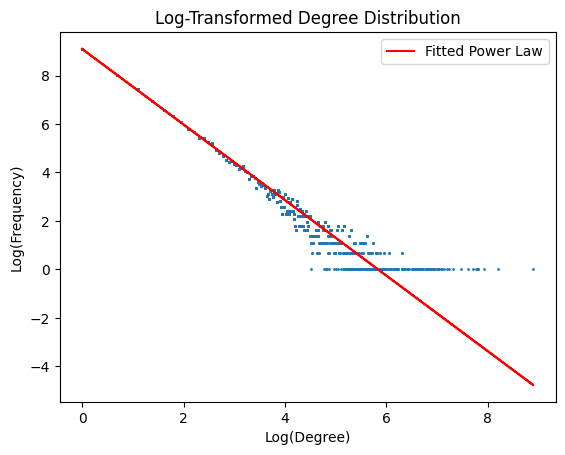

Power Law Exponent: 1.5584432577421268


In [17]:
# Remove degree 0 and degrees with zero frequency
degree_df = degree_df[(degree_df['Degree'] != 0) & (degree_df['Frequency'] != 0)]

# Perform a simple linear regression on the log-transformed degree distribution
x = np.log(degree_df['Degree'])
y = np.log(degree_df['Frequency'])
slope, intercept = np.polyfit(x, y, 1)

# Plot the log-transformed degree distribution and the fitted power law function
plt.scatter(x, y, s=1)
plt.plot(x, slope * x + intercept, color='red', label='Fitted Power Law')
plt.xlabel('Log(Degree)')
plt.ylabel('Log(Frequency)')
plt.title('Log-Transformed Degree Distribution')
plt.legend()
plt.show()

# Print the estimated power law exponent
print('Power Law Exponent:', -slope)

In [18]:
# Extract the strongly connected giant component of G
giant_component = max(nx.strongly_connected_components(G), key=len)
giant_component_graph = G.subgraph(giant_component)
print(giant_component_graph)

# Calculate the connectivity probability and average shortest path length
print("Connectivity and average path length: ", estimate_connectivity(giant_component_graph))

MultiDiGraph with 11564 nodes and 225477 edges
Connectivity and average path length:  (1.0, np.float64(4.15))


In [19]:
# 1. Size of the largest connected component (as a fraction of all nodes)
fraction_largest_cc = len(giant_component) / G.number_of_nodes()
print(f"Fraction of nodes in largest connected component: {fraction_largest_cc:.4f}")

# 2. Number of connected components
# num_components = nx.number_connected_components(G)
# print(f"Number of connected components: {num_components}")

# 3. Average clustering coefficient
# avg_clustering = nx.average_clustering(G)
# print(f"Average clustering coefficient: {avg_clustering:.4f}")

# 4. Network diameter (only for the largest connected component)
# if nx.is_connected(giant_component):
#     diameter = nx.diameter(giant_component)
#     print(f"Diameter of largest connected component: {diameter}")
# else:
#     print("Largest component is not connected (unexpected for undirected graphs).")

Fraction of nodes in largest connected component: 0.3232
